In [2]:
# =============================
# 1. Import Required Libraries
# =============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Make plots prettier
plt.style.use("ggplot")
sns.set_palette("Set2")

# =============================
# 2. Load Data
# =============================
df = pd.read_csv("yt_processed.csv")

# Preview
df.head()


,video_id,comment_id,author,text,sentiment,score,publishedAt,translated,sentiment_model,emotion,sarcasm
0,IHNzOHi8sJs,UgzVRhsh0gPGImYbxjp4AaABAg,@HbibDridi-b9l,Lisa😍😍😍❤❤❤❤,neutral,0.0,2025-08-25T15:58:21Z,Lisa. Lisa.,neutral,anger,LABEL_1
1,IHNzOHi8sJs,UgwDT25hJLSmSiF0qad4AaABAg,@RazaneBoukermouche,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,0.0,2025-08-25T15:03:04Z,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,joy,LABEL_0
2,IHNzOHi8sJs,Ugzxdzx-bEkt3gGQT2B4AaABAg,@RazaneBoukermouche,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,0.0,2025-08-25T15:01:33Z,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,joy,LABEL_0
3,IHNzOHi8sJs,UgyobMPsvzfBvr6-F294AaABAg,@faellz211,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,0.0,2025-08-25T14:33:49Z,"<a href=""https://www.youtube.com/watch?v=IHNzO...",neutral,joy,LABEL_0
4,IHNzOHi8sJs,UgxtgGvbOfDQN3ptumh4AaABAg,@PyaePhyoMaung-l8q,🖤💗,neutral,0.0,2025-08-25T14:14:49Z,I'm sorry.,negative,sadness,LABEL_0


In [4]:
print(df.shape)
df.info()

(500, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   video_id         500 non-null    object 
 1   comment_id       500 non-null    object 
 2   author           500 non-null    object 
 3   text             500 non-null    object 
 4   sentiment        500 non-null    object 
 5   score            500 non-null    float64
 6   publishedAt      500 non-null    object 
 7   translated       500 non-null    object 
 8   sentiment_model  500 non-null    object 
 9   emotion          500 non-null    object 
 10  sarcasm          500 non-null    object 
dtypes: float64(1), object(10)
memory usage: 43.1+ KB


In [5]:
print(df.isnull().sum())

video_id           0
comment_id         0
author             0
text               0
sentiment          0
score              0
publishedAt        0
translated         0
sentiment_model    0
emotion            0
sarcasm            0
dtype: int64


In [7]:
df.nunique()

video_id             1
comment_id         500
author             443
text               481
sentiment            3
score               66
publishedAt        500
translated         422
sentiment_model      3
emotion              6
sarcasm              2
dtype: int64

In [8]:
print(df.describe())

            score
count  500.000000
mean     0.107387
std      0.267936
min     -0.624900
25%      0.000000
50%      0.000000
75%      0.000000
max      0.980300


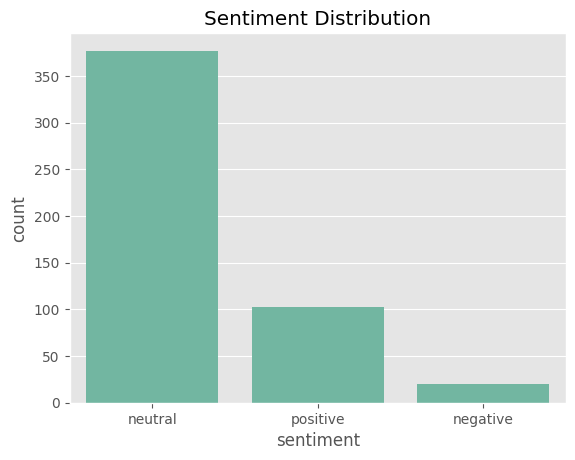

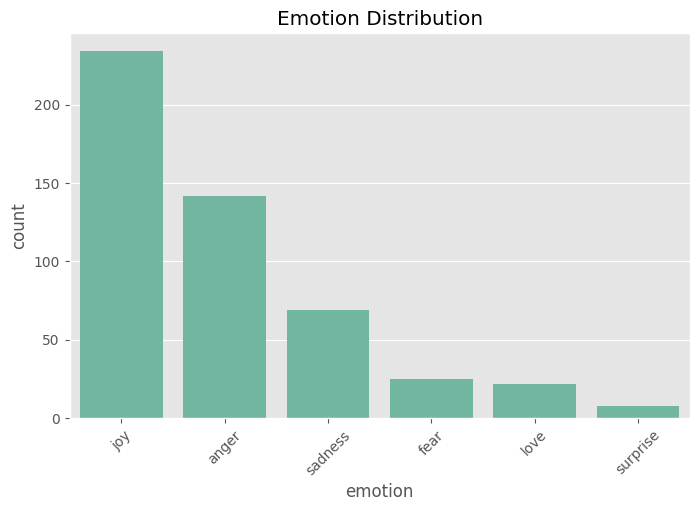

In [15]:
# Sentiment counts
sns.countplot(x="sentiment", data=df)
plt.title("Sentiment Distribution")
plt.show()

# Emotion counts
plt.figure(figsize=(8,5))
sns.countplot(x="emotion", data=df, order=df["emotion"].value_counts().index)
plt.title("Emotion Distribution")
plt.xticks(rotation=45)
plt.show()


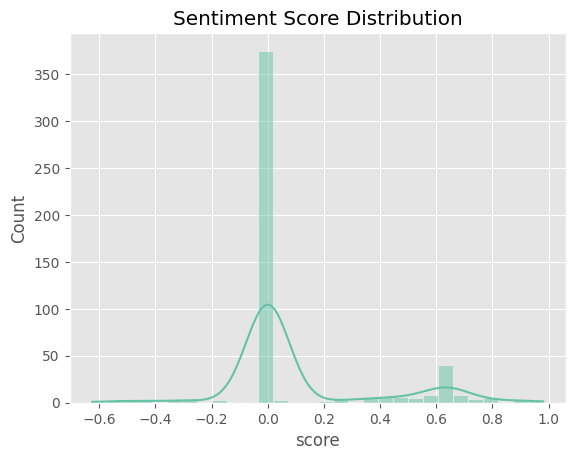

In [10]:
sns.histplot(df['score'], bins=30, kde=True)
plt.title("Sentiment Score Distribution")
plt.show()


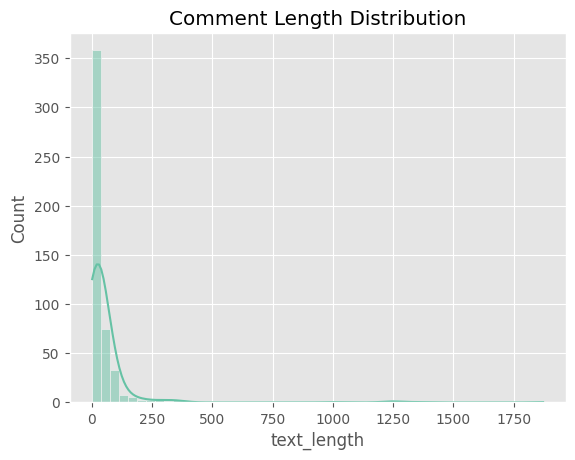

sentiment
negative     81.750000
neutral      35.551724
positive    116.359223
Name: text_length, dtype: float64

In [11]:
df["text_length"] = df["text"].astype(str).apply(len)

sns.histplot(df["text_length"], bins=50, kde=True)
plt.title("Comment Length Distribution")
plt.show()

# Avg length per sentiment
df.groupby("sentiment")["text_length"].mean()


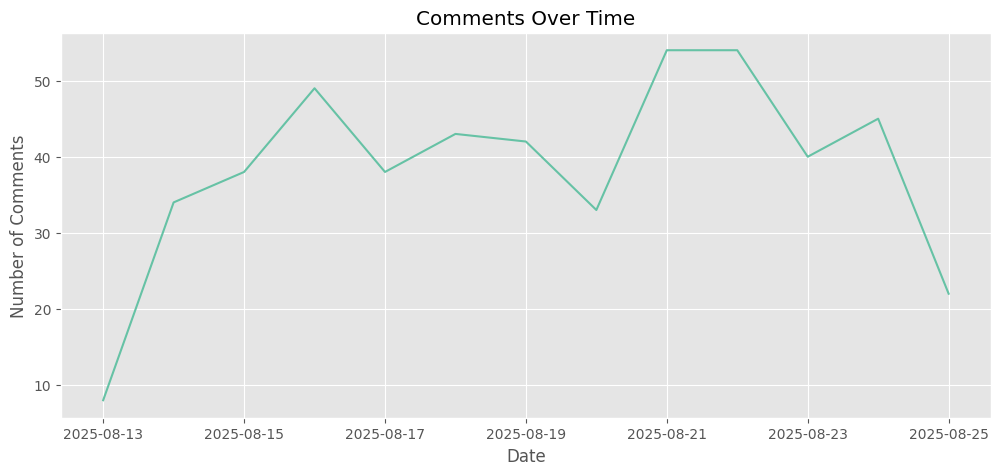

In [12]:
df["publishedAt"] = pd.to_datetime(df["publishedAt"])

# Comments per day
comments_per_day = df.groupby(df["publishedAt"].dt.date).size()

plt.figure(figsize=(12,5))
comments_per_day.plot()
plt.title("Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.show()


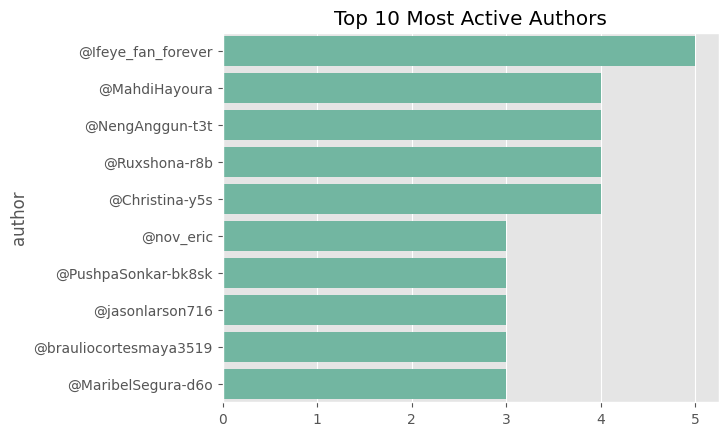

In [13]:
top_authors = df["author"].value_counts().head(10)

sns.barplot(x=top_authors.values, y=top_authors.index)
plt.title("Top 10 Most Active Authors")
plt.show()


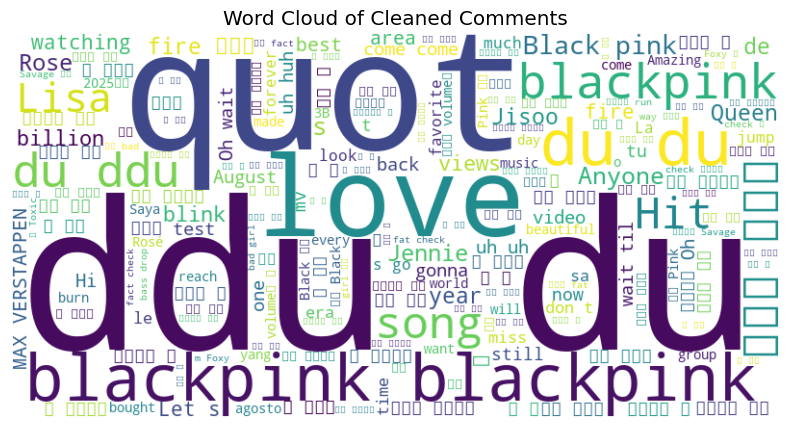

In [17]:
from wordcloud import WordCloud
import re

# Clean text: remove 'br' and HTML-like tags
df["clean_text"] = df["text"].astype(str).apply(lambda x: re.sub(r"\bbr\b", " ", x, flags=re.IGNORECASE))
df["clean_text"] = df["clean_text"].apply(lambda x: re.sub(r"<.*?>", " ", x))  # remove HTML tags

# Generate WordCloud
all_text = " ".join(df["clean_text"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Comments")
plt.show()


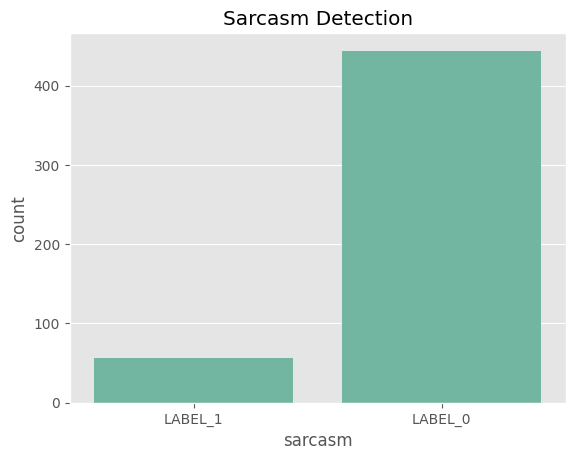

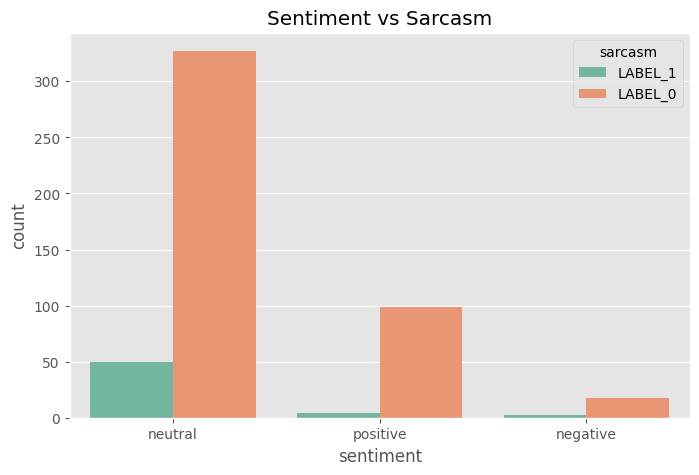

In [16]:
sns.countplot(x="sarcasm", data=df)
plt.title("Sarcasm Detection")
plt.show()

# Sentiment vs Sarcasm
plt.figure(figsize=(8,5))
sns.countplot(x="sentiment", hue="sarcasm", data=df)
plt.title("Sentiment vs Sarcasm")
plt.show()


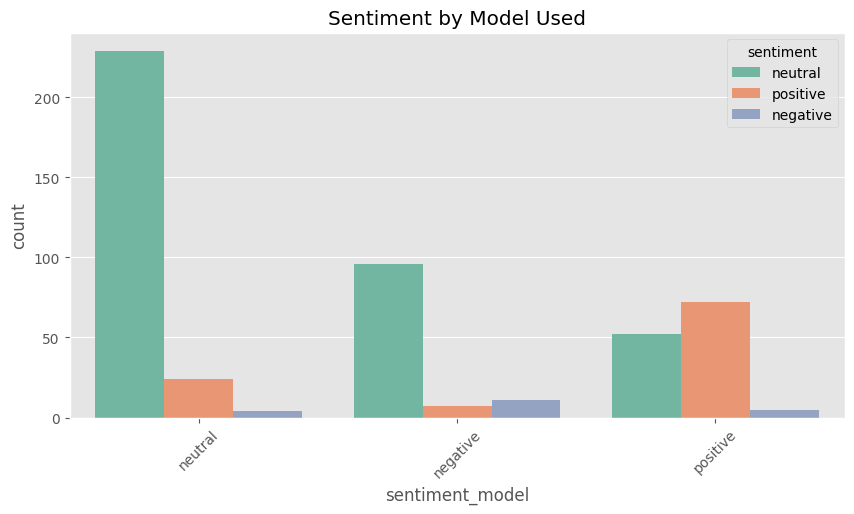

In [18]:
plt.figure(figsize=(10,5))
sns.countplot(x="sentiment_model", hue="sentiment", data=df)
plt.title("Sentiment by Model Used")
plt.xticks(rotation=45)
plt.show()
